<a href="https://colab.research.google.com/github/alpopfares25/Breast-Cancer-Classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset link : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [ ]:
%matplotlib inline

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



import seaborn as sns #for visualization

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
y=data.diagnosis.values

Unnamed & ID are not important columns

In [ ]:
drop_list=["id","diagnosis","Unnamed: 32"]
x=data.drop(drop_list,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dataset has many features so we should ana;yze it for any featuers are correlated to reduce them into only one for example if features X , Y ,Z are correlated we only take one of them say X and drop the others from dataset

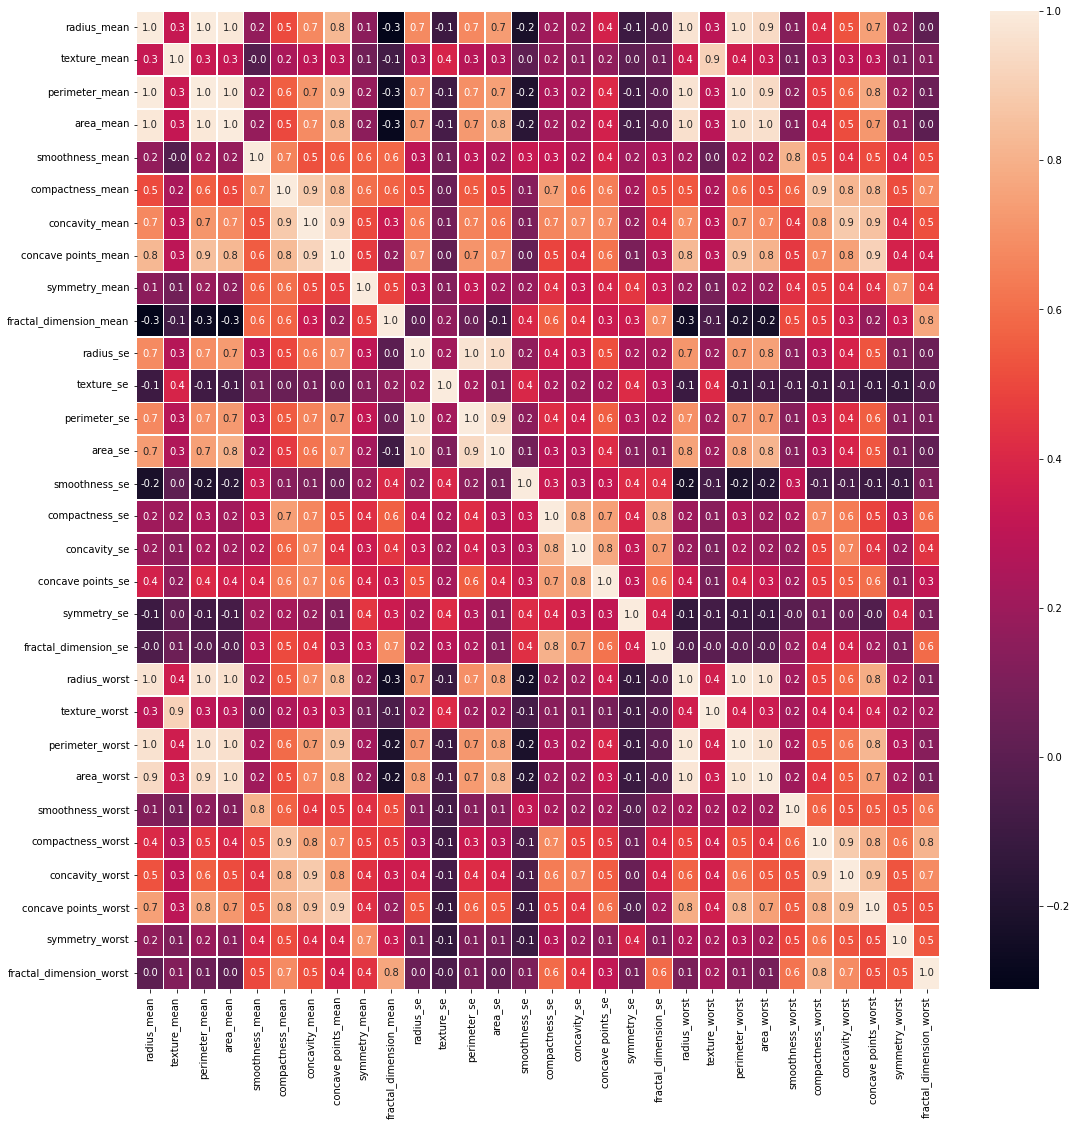

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(),annot=True,linewidth=0.5,fmt="0.1f",ax=ax)

from heatmap we found that radius_mean, perimeter_mean and area_mean are correlated we choose area_mean
Compactness_mean, concavity_mean and concave points_mean are correlated we choose concavity_mean
radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.


In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


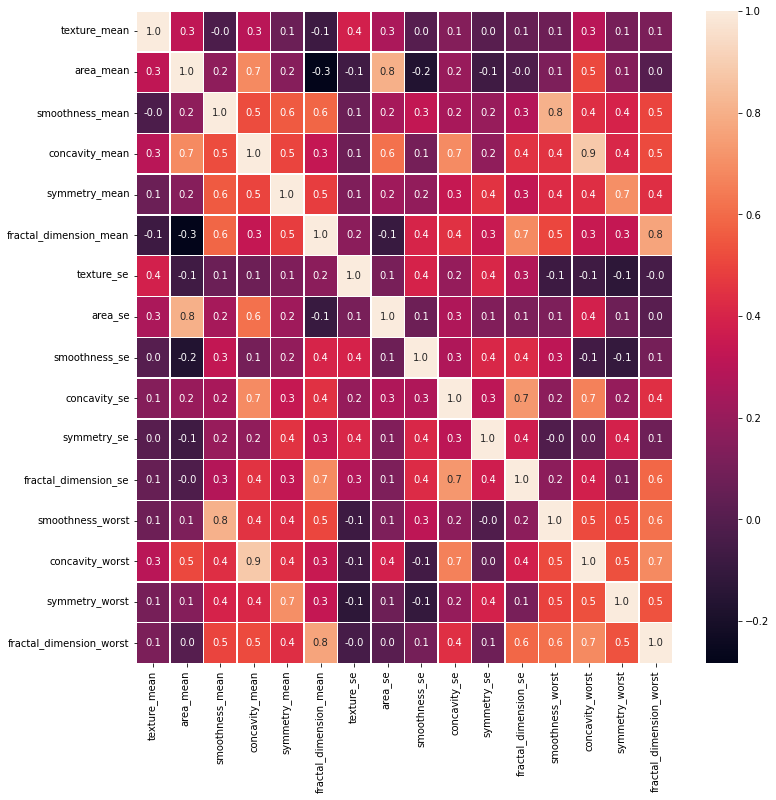

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x_1.corr(),annot=True,linewidth=0.5,fmt="0.1f",ax=ax)

# Now we can start Classification


In [ ]:
#using logisticRegression

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
LR=LogisticRegression()
LR.fit(x_train,y_train)
ac_lr = accuracy_score(y_test,LR.predict(x_test))
print('Accuracy is: ',ac_lr)

Accuracy is:  0.9824561403508771


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#using Perceptron
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
PR=Perceptron()
PR.fit(x_train,y_train)
ac_pr = accuracy_score(y_test,PR.predict(x_test))
print('Accuracy is: ',ac_pr)

Accuracy is:  0.8508771929824561


In [ ]:
#using SVM

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
svc=SVC()
svc.fit(x_train,y_train)
ac_svc = accuracy_score(y_test,svc.predict(x_test))
print('Accuracy is: ',ac_svc)

Accuracy is:  0.9035087719298246


In [ ]:
#using Decision Tree

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
DT= DecisionTreeClassifier(max_depth=4)
DT.fit(x_train,y_train)
ac_dt = accuracy_score(y_test,DT.predict(x_test))
print('Accuracy is: ',ac_dt)


Accuracy is:  0.956140350877193


In [ ]:
#using Random Forest

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
RF= RandomForestClassifier(n_estimators=10, max_depth=5)
RF.fit(x_train,y_train)
ac_rf = accuracy_score(y_test,RF.predict(x_test))
print('Accuracy is: ',ac_rf)

Accuracy is:  0.9736842105263158


In [ ]:
#using KNN

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, stratify=y)
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
ac_knn = accuracy_score(y_test,knn.predict(x_test))
print('Accuracy is: ',ac_knn)

Accuracy is:  0.9298245614035088


# All Models

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Perceptron', 'Decision Tree'],
    'Score': [ac_svc, ac_knn, ac_lr, ac_rf,ac_pr,ac_dt,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.982456
3,Random Forest,0.973684
5,Decision Tree,0.956140
1,KNN,0.929825
0,Support Vector Machines,0.903509
4,Perceptron,0.850877
